`Story`

You have a data sciene project at hand where you have to use the Support Vector Machines to predict Breast Cancer through the dataset you've been given.

The Breast Cancer (Wisconsin) Diagnosis dataset contains the diagnosis and a set of 30 features describing the characteristics of the cell nuclei present in the digitized image of a of a fine needle aspirate (FNA) of a breast mass.

Ten real-valued features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter);
- texture (standard deviation of gray-scale values);
- perimeter;
- area;
- smoothness (local variation in radius lengths);
- compactness (perimeter^2 / area - 1.0);
- concavity (severity of concave portions of the contour);
- concave points (number of concave portions of the contour);
- symmetry;
- fractal dimension (“coastline approximation” - 1).


For all this, you would need help of your mentor Shikha, who has extensively studied and worked with data.

# AIM 
Analyze the features to understand the predictive value for diagnosis using Support Vector Machines. Further,you have to create models using two different algorithms and use the models to predict the diagnosis.

The first thing you are supposed to do is import the packages and load the data into a dataframe.
So, you import all the libraries you feel would be necessary
# Importing Packages and Loading Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split,ShuffleSplit
import warnings
warnings.filterwarnings('ignore')


sns.set_style('whitegrid')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from itertools import chain

In [3]:
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
from plotly.graph_objs import Scatter, Layout
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

Now, Shikha asks you to Read the CSV File Using Pandas `read_csv` function, and further check the data usinf `.T.head` to be able to see all the columns at once.
# Load the Data

In [4]:

df = pd.read_csv('data.csv')

df.T.head(50)

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
id,842302,842517,84300903,84348301,84358402,843786,844359,84458202,844981,84501001,...,925291,925292,925311,925622,926125,926424,926682,926954,927241,92751
diagnosis,M,M,M,M,M,M,M,M,M,M,...,B,B,B,M,M,M,M,M,M,B
radius_mean,17.99,20.57,19.69,11.42,20.29,12.45,18.25,13.71,13,12.46,...,11.51,14.05,11.2,15.22,20.92,21.56,20.13,16.6,20.6,7.76
texture_mean,10.38,17.77,21.25,20.38,14.34,15.7,19.98,20.83,21.82,24.04,...,23.93,27.15,29.37,30.62,25.09,22.39,28.25,28.08,29.33,24.54
perimeter_mean,122.8,132.9,130,77.58,135.1,82.57,119.6,90.2,87.5,83.97,...,74.52,91.38,70.67,103.4,143,142,131.2,108.3,140.1,47.92
area_mean,1001,1326,1203,386.1,1297,477.1,1040,577.9,519.8,475.9,...,403.5,600.4,386,716.9,1347,1479,1261,858.1,1265,181
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003,0.1278,0.09463,0.1189,0.1273,0.1186,...,0.09261,0.09929,0.07449,0.1048,0.1099,0.111,0.0978,0.08455,0.1178,0.05263
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328,0.17,0.109,0.1645,0.1932,0.2396,...,0.1021,0.1126,0.03558,0.2087,0.2236,0.1159,0.1034,0.1023,0.277,0.04362
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198,0.1578,0.1127,0.09366,0.1859,0.2273,...,0.1112,0.04462,0,0.255,0.3174,0.2439,0.144,0.09251,0.3514,0
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043,0.08089,0.074,0.05985,0.09353,0.08543,...,0.04105,0.04304,0,0.09429,0.1474,0.1389,0.09791,0.05302,0.152,0


`Interpretation`: We see that our data set has 32 columns and 569 rows

# Data cleaning and data wrangling

`Story` 
Shikha tells you that Data cleansing has played a significant role in the history of data management as well as data analytics and it is still developing rapidly. Furthermore, data cleansing in Big Data is considered to be a challenge due to its already high and increasing volume, variety and velocity of data in several applications.

Since real-life data is dirty, it gets costly and, therefore, the significance of data quality management in business is highlighted. Data cleansing or scrubbing or appending is the procedure of correcting or removing inaccurate and corrupt data.

First, you check the concise summery of the dataset.

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

`Interpretation`: The major chunk of our data is float type, only diagnosis is an object and IDs are integer type.

Now, since the dataset can also contain null values count total rows in each column which contain null values using `isna().sum()`

In [6]:

df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

`Interpretation`: We have no null values in this dataset, so we dont need to clean up that part.

Now, Shikha aska you to use the `duplicated()` function in pandas  to return the duplicate row as True and othter as False for counting the duplicate elements we sum all the rows

In [7]:

sum(df.duplicated())

0

`Interpretation`: Now we see that the data is completely clean as there is no bad data.

Now, Shikha advises you to delete the useless columns for our analysis, hence you delete the "id" column

In [8]:

df.drop("id",axis=1,inplace=True)



# Exploratory Data Analysis (EDA)

`Story`

Shikha now tells you that Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Now, it's time to visualise our stats and data before making our model.

To sum up all Exploratory Data Analysis is a philosophical and an artistical approach to guage every nuance from the data at early encounter.

# Basic Statistical Details

First, Shikhka asks you to load check the basic desciption of the data using `describe()`

In [9]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


`Interpretation`: We have been all the basis staitical meauures

# Bar plot
Now, You want to visualise the diagnosis column so you store the number of values of that column using

`df['diagnosis'].value_counts()` and store it in 2 different variables (B= Benign, M = Maligant) and draw a bar plot

B    357
M    212
Name: diagnosis, dtype: int64


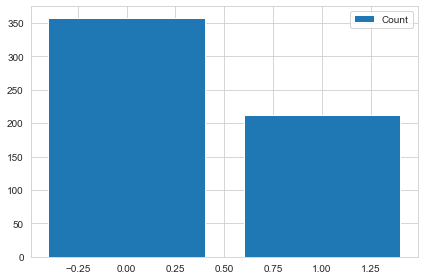

In [10]:
B, M = df['diagnosis'].value_counts()
s = [B,M]
print(df['diagnosis'].value_counts())
plt.figure(figsize=(6, 4))

plt.bar([0,1], s,align='center',
        label='Count')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc='best')
plt.tight_layout()

`Interpretation`: We see that there are more cases of Benign that Maligant tumours.

# Violin Plot of Features by Diagnosis

`Story`

Shikha now expliansyou about Violin Plots by telling that In general, violin plots are a method of plotting numeric data and can be considered a combination of the box plot with a kernel density plot. In the violin plot, we can find the same information as in the box plots:

* median (a white dot on the violin plot)
* interquartile range (the black bar in the center of violin)
* the lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively. These values can be used in a simple outlier detection technique (Tukey’s fences) — observations lying outside of these “fences” can be considered outliers.

    
    The unquestionable advantage of the violin plot over the box plot is that aside from showing the abovementioned statistics it also shows the entire distribution of the data. This is of interest, especially when dealing with multimodal data, i.e., a distribution with more than one peak.
    
    
    
`How?`

To draw a violin plot, Shikha asks you to first normalise the data and then use  `pandas.melt` to Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.

    This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’.
    
Finally, use the code `sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")` to draw a violin plot using SeaBorn

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

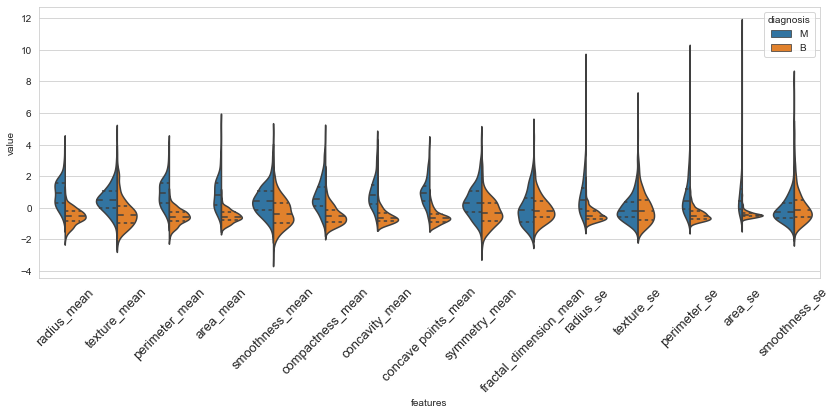

In [11]:
data_dia = df['diagnosis']
data = df.drop('diagnosis',axis=1)
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([df['diagnosis'],data_n_2.iloc[:,0:15]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(14,5))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=45,fontsize=13)

`Interpretation`: In texture_mean feature, median of the Malignant and Benign looks like separated so it can be good for classification. However, in fractal_dimension_mean feature, median of the Malignant and Benign does not looks like separated so it does not gives good information for classification

# Kde Plot For Each Mean Feature 

`Story`
A density estimator is an algorithm which seeks to model the probability distribution that generated a dataset. For one dimensional data, you are probably already familiar with one simple density estimator: the histogram. A histogram divides the data into discrete bins, counts the number of points that fall in each bin, and then visualizes the results in an intuitive manner.



One of the issues with using a histogram as a density estimator is that the choice of bin size and location can lead to representations that have qualitatively different features


You are told that KDE Plo,t described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable. We can also plot a single graph for multiple samples which helps in more efficient data visualization.

The free parameters of kernel density estimation are the kernel, which specifies the shape of the distribution placed at each point, and the kernel bandwidth, which controls the size of the kernel at each point. In practice, there are many kernels you might use for a kernel density estimation: in particular, the Scikit-Learn KDE implementation supports one of six kernels.

While there are several versions of kernel density estimation implemented in Python (notably in the SciPy and StatsModels packages), I prefer to use Scikit-Learn's version because of its efficiency and flexibility. It is implemented in the sklearn.neighbors.KernelDensity estimator, which handles KDE in multiple dimensions with one of six kernels and one of a couple dozen distance metrics. Because KDE can be fairly computationally intensive, the Scikit-Learn estimator uses a tree-based algorithm under the hood and can trade off computation time for accuracy using the atol (absolute tolerance) and rtol (relative tolerance) parameters. 

#### Here, we will use Seaborn KDE

`seaborn.kdeplot`

seaborn.kdeplot(data, data2=None, shade=False, vertical=False, kernel='gau', bw='scott', gridsize=100, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)

    Fit and plot a univariate or bivariate kernel density estimate.
    
We will find the KDE for each feature for diagnosis M/B

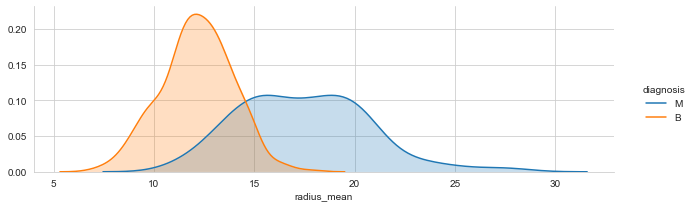

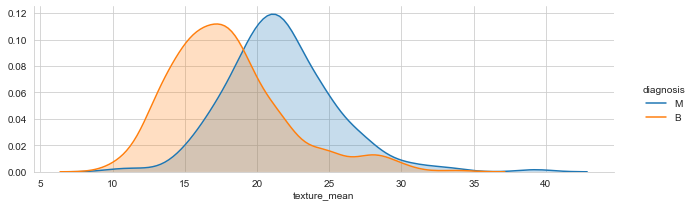

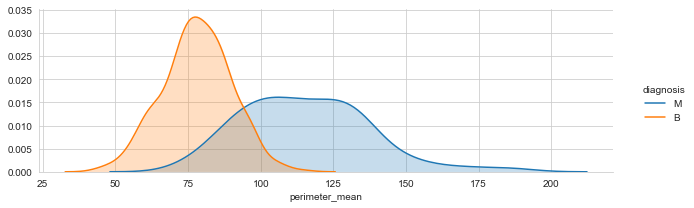

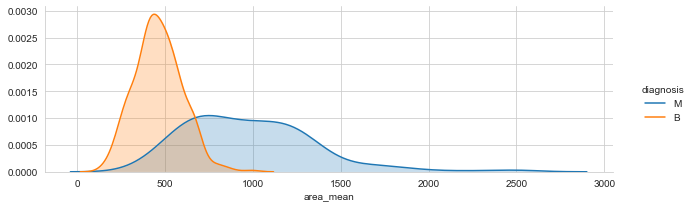

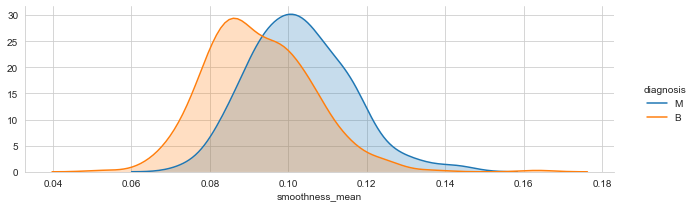

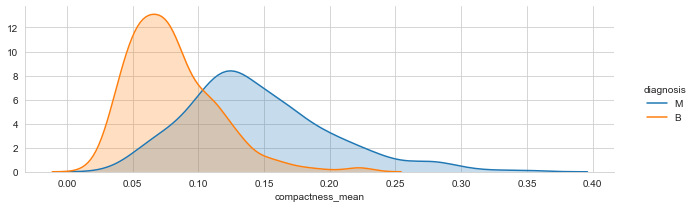

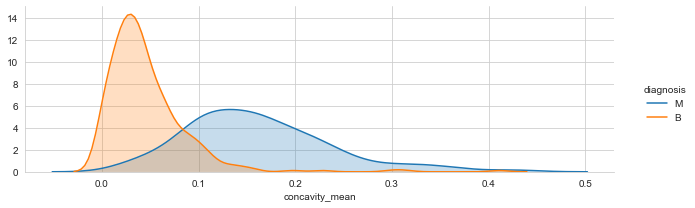

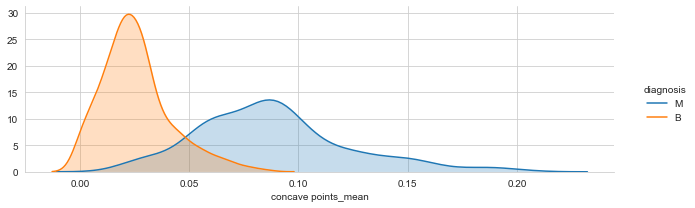

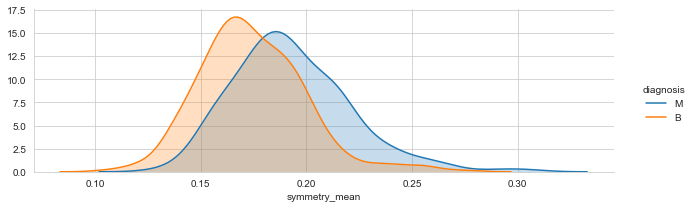

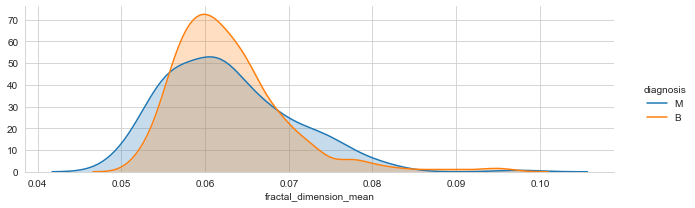

In [12]:
mean_col = [col for col in df.columns if col.endswith('_mean')]
for i in range(len(mean_col)):
    sns.FacetGrid(df,hue="diagnosis",aspect=3,margin_titles=True).map(sns.kdeplot,mean_col[i],shade= True).add_legend()
    #ax.set_title('lalala')


`Interpretation`
- We can say that two variables are related with each other, if one of them gives information about others
- For example, price and distance. If you go long distance with taxi you will pay more. There fore we can say that price and distance are positively related with each other.
- Scatter Plot:  Simplest way to check relationship between two variables
- Lets look at relationship between radius mean and area mean. In scatter plot you can see that when radius mean increases, area mean also increases. Therefore, they are positively correlated with each other.
- There is no correlation between area mean and fractal dimension se. Because when area mean changes, fractal dimension se is not affected by chance of area mean

# Correlation Heatmap

`Story`

Shikha reminds you of the importance of a Correlation Heatmap.

A correlation heatmap uses colored cells, typically in a monochromatic scale, to show a 2D correlation matrix (table) between two discrete dimensions or event types. The values of the first dimensions appear as rows of the table, while the values of the second dimension are represented by the columns of the table. The color value of the cells is proportional to the number of measurements that match the dimensional values. This enables you to quickly identify incidence patterns, and to recognize anomalies.

Correlation Heatmap visuals are similar to Chord Visuals because they both compare exactly two dimensions. Correlation heatmaps are ideal for comparing the measurement for each pair of dimension values.

You know how to draw a correlation heatmap as you have used ir before, so you write the code for it.

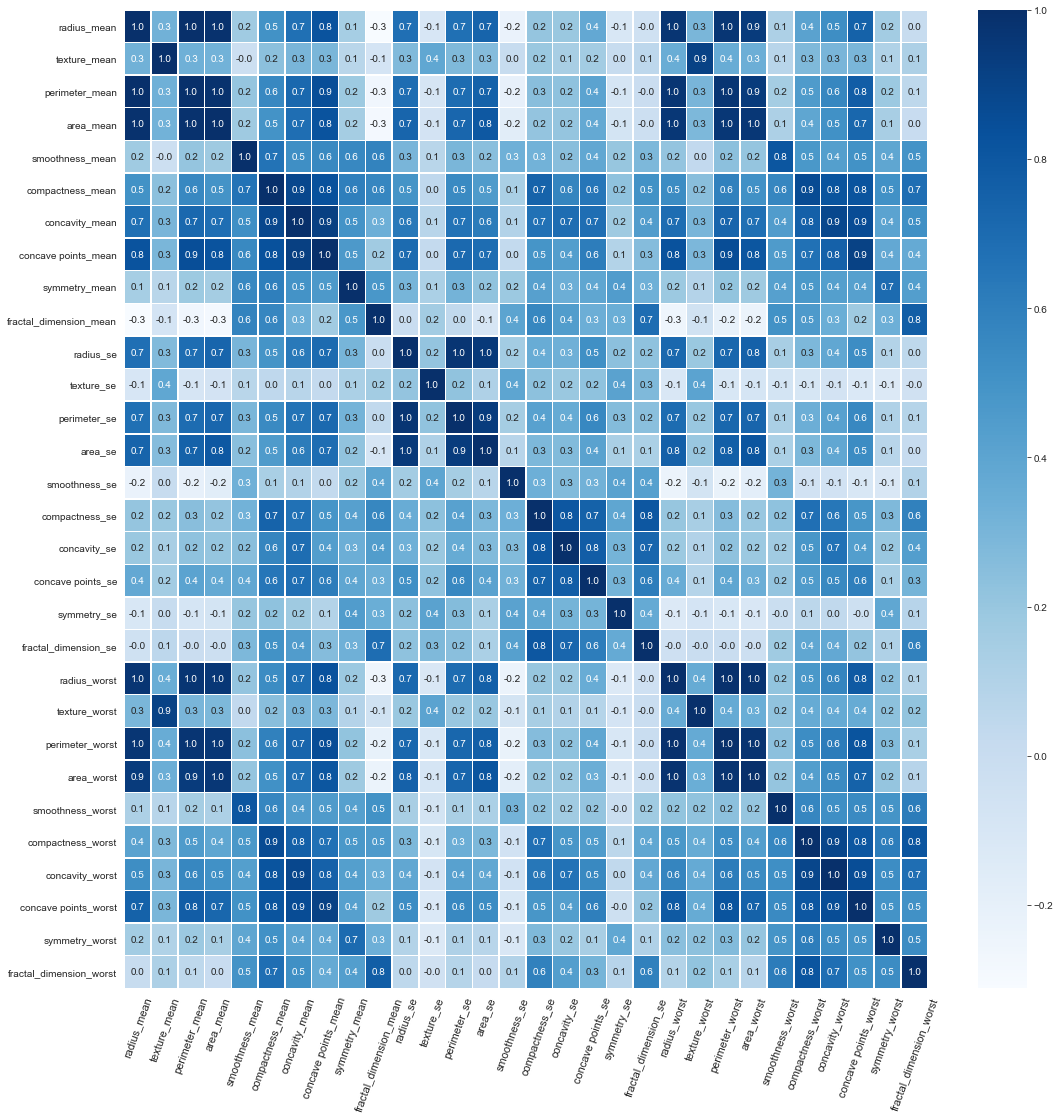

In [13]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), cmap='Blues',annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.xticks(fontsize=11,rotation=70)
plt.show()

`Interpretation`:

- the radius, parameter and area are highly correlated as expected from their relation so from these we will use anyone of them
- compactness_mean, concavity_mean and concavepoint_mean are highly correlated so we will use compactness_mean from here
- so selected Parameter for use is perimeter_mean, texture_mean, compactness_mean, symmetry_mean

# Feature Pair

Now, shikha asks you to code the Pair Plot using Seaborn, and reminds you to use 
`sns_plot = sns.pairplot(data=df[cols],hue='diagnosis')`


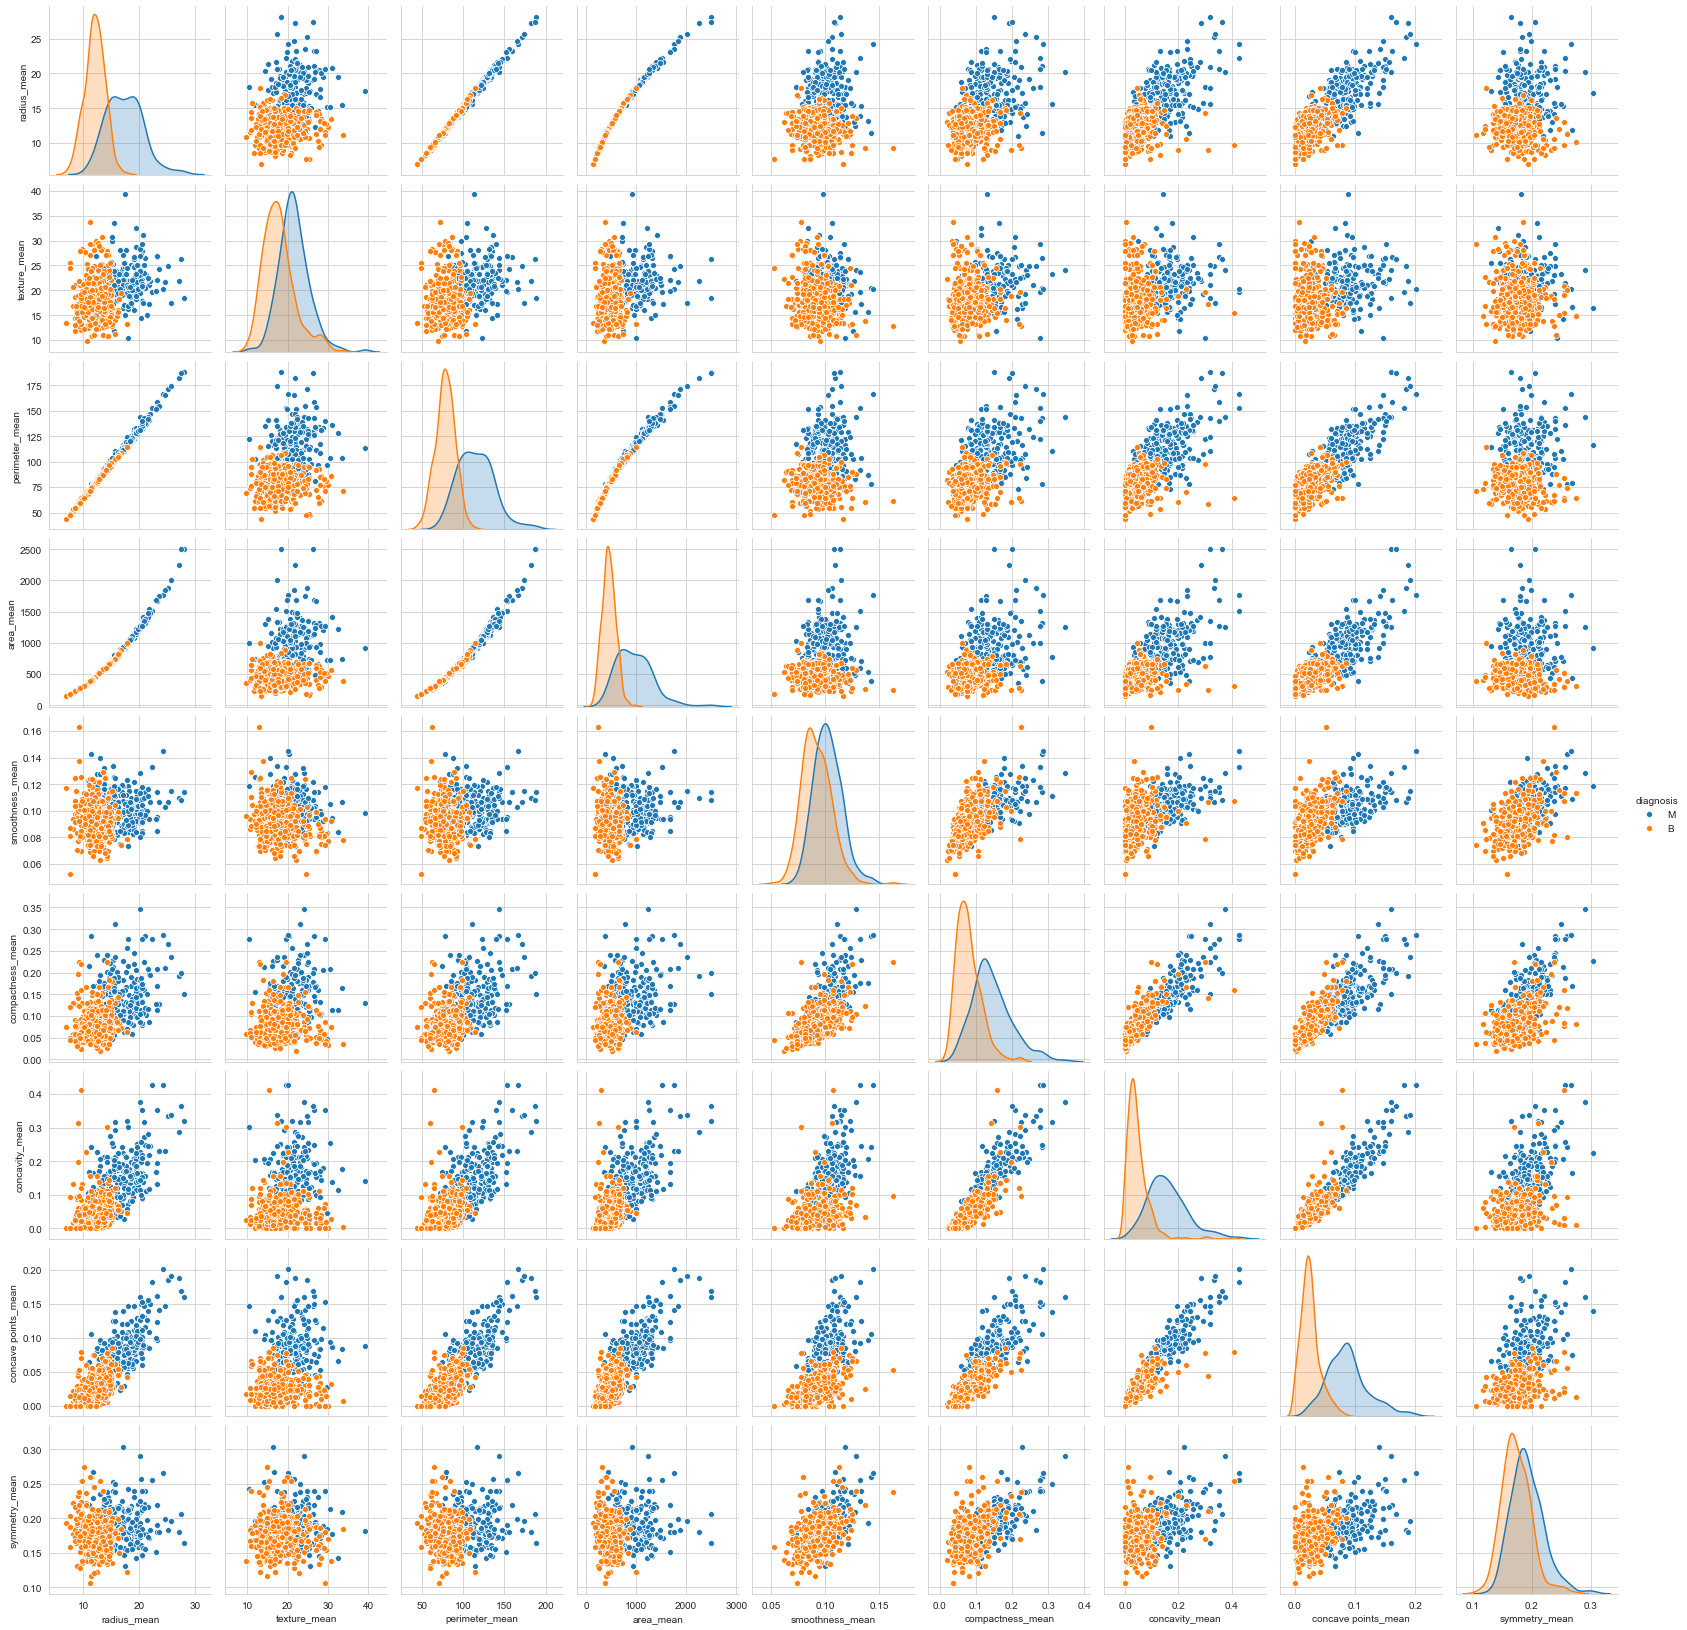

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean','diagnosis']
sns_plot = sns.pairplot(data=df[cols],hue='diagnosis')



# Statistical Analysis(Outliers Detection) 

`Story`

As you know that An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal. Before abnormal observations can be singled out, it is necessary to characterize normal observations. 

While looking histogram as yok can see there are rare values in bening distribution (green in graph) <br>
There values can be errors or rare events.   <br>
These errors and rare events can be called outliers.  <br>
Calculating outliers:   
- first we need to calculate first quartile (Q1)(25%)  <br>
- then find IQR(inter quartile range) = Q3-Q1  <br>
- finally compute Q1 - 1.5IQR and Q3 + 1.5IQR   <br>
- Anything outside this range is an outlier   <br>


# Box Plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

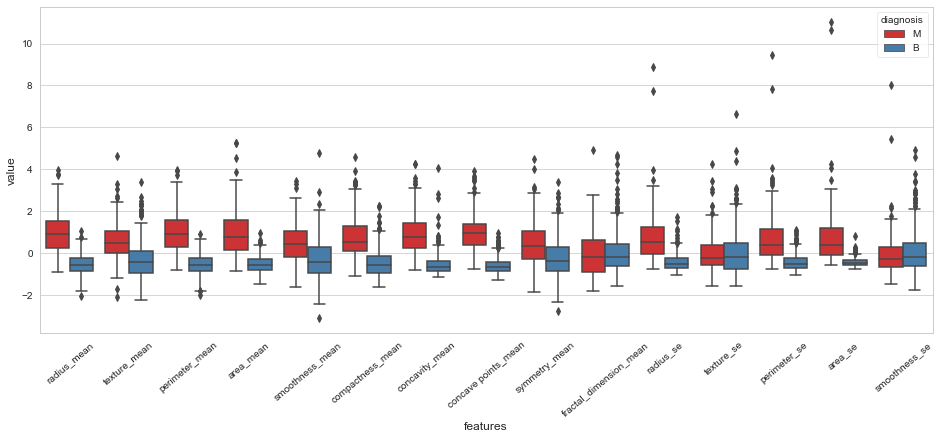

In [ ]:
plt.style.use('ggplot')
sns.set_style('whitegrid')
plt.figure(figsize=(16,6))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data,palette='Set1')
plt.xticks(rotation=40)

`Interpretation`:  We see that our data has some outliers.
Now, we will use the Inter quantile range method to remove them


# Remove Outliers Using IQR

`Story`

Shikha tells you that Using the Python Counter tool, you can count the key-value pairs in an object, also called a hashtable object. The Counter holds the data in an unordered collection, just like hashtable objects. The elements here represent the keys and the count as values. It allows you to count the items in an iterable lis

`How?`
She tells you to define a function to detect the outliers using the following hint:

    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(train_data[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(train_data[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = train_data\
        [(train_data[col] < Q1 - outlier_step) | (train_data[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )

In [16]:
from collections import Counter

def detect_outliers(train_data,n,features):
    outlier_indices = []
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(train_data[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(train_data[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = train_data[(train_data[col] < Q1 - outlier_step) | (train_data[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers
list_atributes = df.drop('diagnosis',axis=1).columns
Outliers_to_drop = detect_outliers(df,2,list_atributes)

In [17]:
df.loc[Outliers_to_drop]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,M,25.22,24.91,171.50,1878.0,0.10630,0.2665,0.3339,0.18450,0.1829,...,30.00,33.62,211.70,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,M,22.27,19.67,152.80,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,...,28.40,28.01,206.80,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,M,24.25,20.20,166.20,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,...,26.02,23.99,180.90,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
164,M,23.27,22.04,152.10,1686.0,0.08439,0.1145,0.1324,0.09702,0.1801,...,28.01,28.22,184.20,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187
180,M,27.22,21.87,182.10,2250.0,0.10940,0.1914,0.2871,0.18780,0.1800,...,33.12,32.85,220.80,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,B,13.24,20.13,86.87,542.9,0.08284,0.1223,0.1010,0.02833,0.1601,...,15.44,25.50,115.00,733.5,0.1201,0.5646,0.6556,0.1357,0.2845,0.12490
485,B,12.45,16.41,82.85,476.7,0.09514,0.1511,0.1544,0.04846,0.2082,...,13.78,21.03,97.82,580.6,0.1175,0.4061,0.4896,0.1342,0.3231,0.10340
242,B,11.30,18.19,73.93,389.4,0.09592,0.1325,0.1548,0.02854,0.2054,...,12.58,27.96,87.16,472.9,0.1347,0.4848,0.7436,0.1218,0.3308,0.12970
15,M,14.54,27.54,96.73,658.8,0.11390,0.1595,0.1639,0.07364,0.2303,...,17.46,37.13,124.10,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410


Now, you drop those outliers and check the dataframe

In [20]:
# Drop outliers
df = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

KeyError: '[503 521 562 563 564 504 520 567 505 507 539] not found in axis'

In [21]:
df.shape

(486, 31)

`Interpretation`: The outliers have now been removed


# Principal Component Analysis(PCA)

`Story`

Now, Shikha introduces you to PCA ,Principal Component Analysis (PCA) is an unsupervised, non-parametric statistical technique primarily used for dimensionality reduction in machine learning.

High dimensionality means that the dataset has a large number of features. The primary problem associated with high-dimensionality in the machine learning field is model overfitting, which reduces the ability to generalize beyond the examples in the training set. Richard Bellman described this phenomenon in 1961 as the Curse of Dimensionality where “Many algorithms that work fine in low dimensions become intractable when the input is high-dimensional. “


The ability to generalize correctly becomes exponentially harder as the dimensionality of the training dataset grows, as the training set covers a dwindling fraction of the input space. Models also become more efficient as the reduced feature set boosts learning rates and diminishes computation costs by removing redundant features.

PCA can also be used to filter noisy datasets, such as image compression. The first principal component expresses the most amount of variance. Each additional component expresses less variance and more noise, so representing the data with a smaller subset of principal components preserves the signal and discards the noise.


## Primer

PCA makes maximum variability in the dataset more visible by rotating the axes. PCA identifies a list of the principal axes to describe the underlying dataset before ranking them according to the amount of variance captured by each.

PCA is an unsupervised learning algorithm as the directions of these components is calculated purely from the explanatory feature set without any reference to response variables.

The number of feature combinations is equal to the number of dimensions of the dataset and in general set the maximum number of PCAs which can be constructed.

## Measurement

Eigenvectors and eigenvalues are measures used to quantify the direction and the magnitude of the variation captured by each axis. Eigenvector describes the angle or direction of the axis through the data space, and the eigenvalue quantifies the magnitude of the variance of the data on the axis.

The number of feature combinations is equal to the number of dimensions of the dataset. For example, a dataset with ten features will have ten eigenvalues/eigenvector combinations.

The correlation between each principal component should be zero as subsequent components capture the remaining variance. Correlation between any pair of eigenvalue/eigenvector is zero so that the axes are orthogonal, i.e., perpendicular to each other in the data space.

The line which maximizes the variance of the data once it is projected into the data space is equivalent to finding the path which minimizes the least-squares distance of the projection.

## Assumptions

PCA is based on the Pearson correlation coefficient framework and inherits similar assumptions.

- Sample size: Minimum of 150 observations and ideally a 5:1 ratio of observation to features (Pallant, 2010)
- Correlations: The feature set is correlated, so the reduced feature set effectively represents the original data space.
- Linearity: All variables exhibit a constant multivariate normal relationship, and principal components are a linear combination of the original features.
- Outliers: No significant outliers in the data as these can have a disproportionate influence on the results.
- Large variance implies more structure: high variance axes are treated as principal components, while low variance axes are treated as noise and discarded.
    
    

`How`?

You create a dictionary for Benign and Maligant mapping them to 1 and 0,and map them to the diagnosis column.

To make a PCA, normalize data is essential
So, you do the following as well 
    
    X_pca = data_pca.values
    X_std = StandardScaler().fit_transform(X_pca)

    pca = PCA(svd_solver='full')
    pca_std = pca.fit(X_std, target_pca).transform(X_std)

In [22]:
group_map = {"M": 1, "B": 0}

df['diagnosis'] = df['diagnosis'].map(group_map)

In [23]:
target_pca = pd.DataFrame(df['diagnosis'])
data_pca = df.drop('diagnosis', axis=1)

#To make a PCA, normalize data is essential
X_pca = data_pca.values
X_std = StandardScaler().fit_transform(X_pca)

pca = PCA(svd_solver='full')
pca_std = pca.fit(X_std, target_pca).transform(X_std)

pca_std = pd.DataFrame(pca_std)
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True, how = 'left')

Now that you have made the PCA, you are asked to visualise it by plotting the `pca.explained_variance_ratio_`

Shikha tells you use `plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o')`, where `numpy.cumsum`

numpy.cumsum(a, axis=None, dtype=None, out=None)

    Return the cumulative sum of the elements along a given axis.

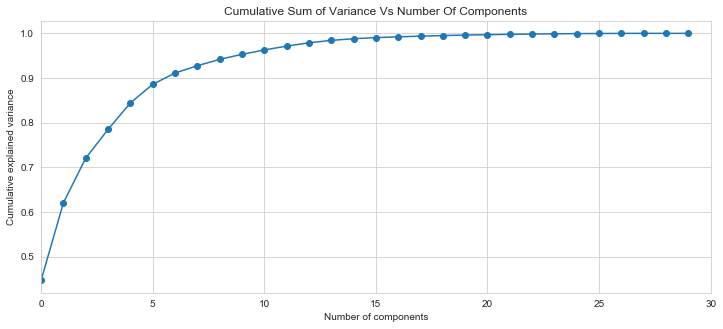

In [24]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o')
plt.xlim(0,30,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Sum of Variance Vs Number Of Components')
plt.show()

`Interpretation`: We see that the variance reaches a stable number after a particular number of components

 Shikha asks you to view the The pca.explained_variance_ratio_ parameter, which returns a vector of the variance explained by each dimension

In [26]:
pca.explained_variance_ratio_

array([4.46380247e-01, 1.73921362e-01, 1.00118724e-01, 6.42590674e-02,
       5.94288560e-02, 4.15840738e-02, 2.54594333e-02, 1.62203187e-02,
       1.43275858e-02, 1.12520663e-02, 9.80155599e-03, 8.63553161e-03,
       7.40950929e-03, 5.45161332e-03, 3.70277887e-03, 2.54032992e-03,
       1.71613424e-03, 1.51916114e-03, 1.30269213e-03, 1.11344975e-03,
       9.03492816e-04, 7.68698470e-04, 6.88546885e-04, 4.77091393e-04,
       4.07666896e-04, 2.85008652e-04, 2.48131245e-04, 5.26691004e-05,
       2.05729397e-05, 3.63227443e-06])

Now, shikha asks you ti build the feature set


# Building Feature Set
-  Preparing data for model building and checking. 30 percent of data is kept aside for validation purposes. We will also be performing scaling of data using sklearn's MinMaxScaler.

In [28]:
X = df.drop('diagnosis',axis=1).values
y = df['diagnosis'].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#X = pd.DataFrame(preprocessing.scale(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


# Support Vector Machine(SVM)

Now, Shikha asks you to create functions for confusion matrix, roc-auc curve and accuracy score, where you will use the scikit learn library to calculate these metrices and also draw their plots.

You are asked to define the followinf 4 functions:
- plot_confusion_metrix(y_test,model_test)
- report_performance(model)
- roc_curves(model)
- accuracy(model)

In all of these you use the standard way of finding out the answer and plot the curve.
Eg:
 

    def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Benign','Malignant']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()
    
    

In [32]:
from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Benign','Malignant']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()
    
from sklearn.metrics import roc_curve, auc
def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, _ = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")

Now that the function has been defined, you fit the model for both RBF and LINEAR kernels and call the functions

On linear kernel:


Confusion Matrix:
[[94  1]
 [ 3 48]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.98      0.94      0.96        51

    accuracy                           0.97       146
   macro avg       0.97      0.97      0.97       146
weighted avg       0.97      0.97      0.97       146



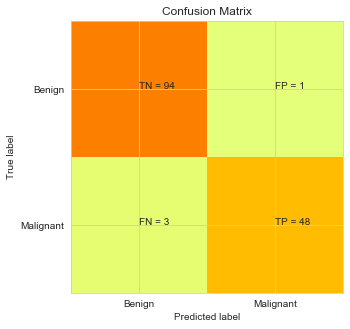

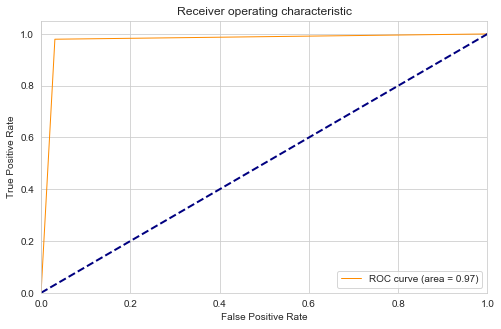


Acuuracy Of the Model:  0.9726027397260274 


On rbf kernel:


Confusion Matrix:
[[95  0]
 [ 3 48]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        95
           1       1.00      0.94      0.97        51

    accuracy                           0.98       146
   macro avg       0.98      0.97      0.98       146
weighted avg       0.98      0.98      0.98       146



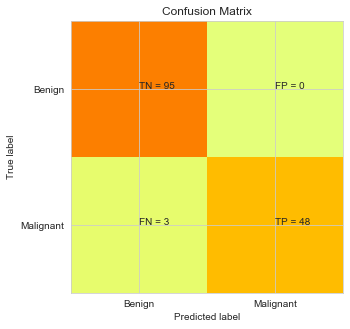

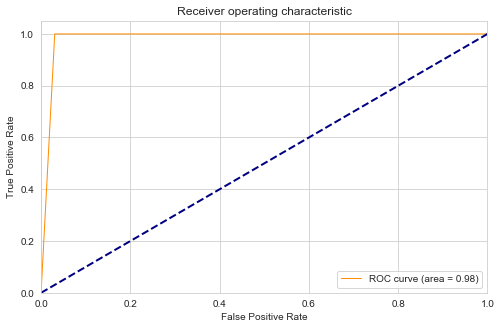


Acuuracy Of the Model:  0.9794520547945206 




In [34]:
for i in ['linear','rbf']:
    clf = SVC(kernel=i)
    clf.fit(X_train,y_train)
    print("On "+ i + " kernel:" )
    
    report_performance(clf)
    roc_curves(clf)
    accuracy(clf)

`Interpretation`: We see that both linear and RBF kernels prove to be very accurate in this case

Now, Shikha asks you to create a function to plot the learning curve ( the train vs test curve ).

`How?`

    def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, scoring=None, obj_line=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
This would be the definition of the function, where the estimator would be the type of kernel required, and the following codes are used to draw the plots:

        train_sizes, train_scores, test_scores = learning_curve/
        ( estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid(True)
    
    
Then, `pyplot.fill_between()` is used to fill area between two horizontal curves. Two points (x, y1) and (x, y2) define the curves. this creates one or more polygons describing the filled areas.

Eg:

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")


# Kernel Selection Using Learning Curve

In [36]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, scoring=None, obj_line=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    from sklearn.model_selection import learning_curve
    from matplotlib import pyplot as plt
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid(True)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Testing score")
    plt.grid(True)
    if obj_line:
        plt.axhline(y=obj_line, color='blue')

    plt.legend(loc="best")


This function is now called and we see the results.

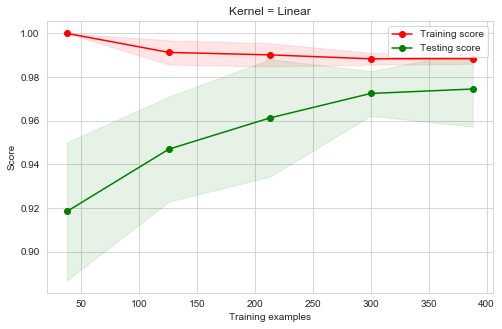

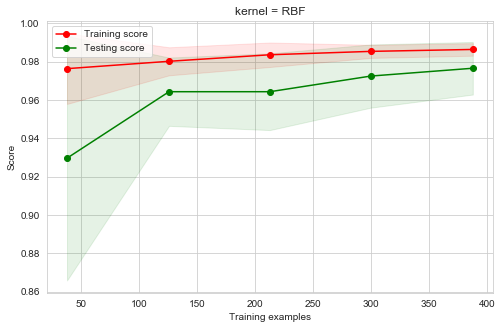

In [37]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(kernel='linear')
plot_learning_curve(estimator, 'Kernel = Linear', X, y, cv=cv)
estimator = SVC(kernel='rbf')
plot_learning_curve(estimator, 'kernel = RBF', X, y, cv=cv)

# Bias-Variance Tradeoff

`Story`
Shikha tells you that: 
 - High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff
 - **On RBF Kernel: High Variance**
 - There is a substantial gap between the training and testing scores.
 -  The training Accuracy is close to 1 while the testing accuracy is comparitively lower (closer to 0.7). This indicates overfitting of data.
 - This indicates the model is fitting the dataset well but not generalizing well hence the model is suffering from high variance(Overfitting).


## Selection of Regularization parameter(C)
 - C is a regularization parameter that controls the trade off between the achieving a low training error and a low testing error that is the ability to generalize your classifier to unseen data. Consider the objective function of a linear SVM 

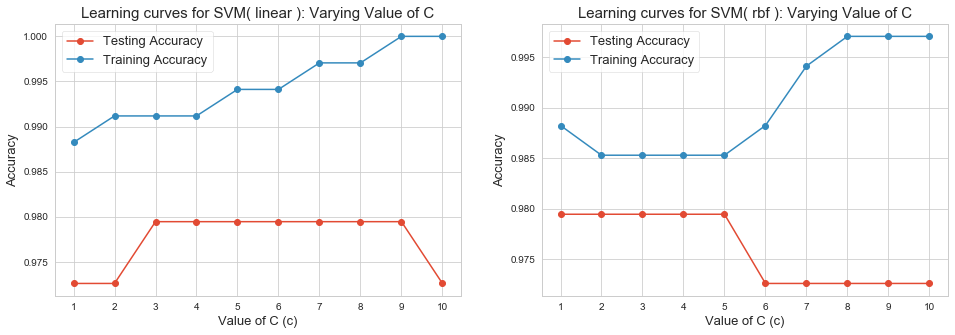

In [ ]:
fig = plt.figure(figsize=(16,5))
def plotlc(kernel=None,k=0):
    plt.subplot(k)
    cp = np.arange(1, 11)
    train_accuracy = np.empty(len(cp))
    test_accuracy = np.empty(len(cp))
    for i, c in enumerate(cp):
        clf = SVC(C=c,kernel = kernel)
        clf.fit(X_train, y_train)
        train_accuracy[i] = clf.score(X_train, y_train)
        test_accuracy[i] = clf.score(X_test, y_test)

        #plt.figure(figsize=(10,5))
    plt.title('Learning curves for SVM( '+ kernel+' ): Varying Value of C', size=15)
    plt.plot(cp, test_accuracy, marker ='o', label = 'Testing Accuracy')
    plt.plot(cp, train_accuracy, marker ='o', label = 'Training Accuracy')
    plt.legend(prop={'size':13})
    plt.xlabel('Value of C (c)', size=13)
    plt.ylabel('Accuracy', size=13)
    plt.xticks(cp);
#plt.show()

plotlc('linear',121)
plotlc('rbf',122)

`Interpretation`: We see that we get the optimum train vs test accuracy for c=1 (rbf) since it is the best fit model.


# Optimal Model

Finally, on the basis of the above analysis, we come to the conclusion that the best parameter are c=1 and kernel = rbf.
Hence, we call the final model on that basis.



Confusion Matrix:
[[95  0]
 [ 3 48]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        95
           1       1.00      0.94      0.97        51

    accuracy                           0.98       146
   macro avg       0.98      0.97      0.98       146
weighted avg       0.98      0.98      0.98       146



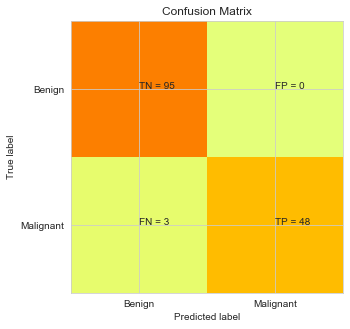

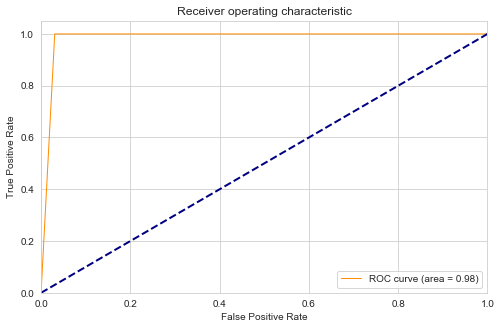


Acuuracy Of the Model:  0.9794520547945206 




In [38]:
clf = SVC(kernel='rbf',C=1)
clf.fit(X_train,y_train)
report_performance(clf)
roc_curves(clf)
accuracy(clf)

# Conclusion

- We can successsfully predict the type of tumour from the given data.
- Pros:
        It works really well with a clear margin of separation
        It is effective in high dimensional spaces.
        It is effective in cases where the number of dimensions is greater than the number of samples.
        It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Cons:
        It doesn’t perform well when we have large data set because the required training time is higher
        It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping
        SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is included in the related SVC method of Python scikit-learn library.